In [1]:
# Import libraries/packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB         
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC                          
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
    
%config InlineBackend.figure_format = 'retina'

In [2]:
#loading the data from the csv file
df = pd.read_csv("/project/data/textClassification/cancer patient data sets.csv", index_col='index')

# Remove Patient ID
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Remove duplicate entries
df=df.drop_duplicates()

display(df)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,35,1,2,1,2,1,2,1,2,3,...,3,4,5,1,3,2,1,2,2,Low
977,45,1,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,Low
979,53,1,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,Low


In [3]:
print('Cancer Levels: ', df['level'].unique())

# Low to High level of Lung Cancer [0-2]
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df.replace({"level": mapping}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


/tmp/ipykernel_14628/1039826177.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"level": mapping}, inplace=True)


In [4]:
# Summary of Values
round(df.describe())

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
count,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,38.0,1.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0
std,12.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
min,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
25%,28.0,1.0,2.0,2.0,4.0,3.0,2.0,3.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
50%,37.0,1.0,3.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,...,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0
75%,46.0,2.0,6.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,...,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0
max,73.0,2.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,...,9.0,8.0,9.0,8.0,8.0,9.0,7.0,7.0,7.0,2.0


In [5]:
#Analyzes the database to see the different levels of risk in the existing database
low = sum(df["level"] == 0)
med = sum(df["level"] == 1)
high = sum(df["level"] == 2)
print("Total Number of Low Cancer Level [0]:", low, "; Percent:", (low / (low + med + high)) * 100, "%")
print("Total Number of Medium Cancer Level [1]:", med, "; Percent:", (med / (low + med + high)) * 100, "%")
print("Total Number of High Cancer Level [2]:", high, "; Percent:", (high / (low + med + high)) * 100, "%")

Total Number of Low Cancer Level [0]: 47 ; Percent: 30.92105263157895 %
Total Number of Medium Cancer Level [1]: 52 ; Percent: 34.21052631578947 %
Total Number of High Cancer Level [2]: 53 ; Percent: 34.868421052631575 %


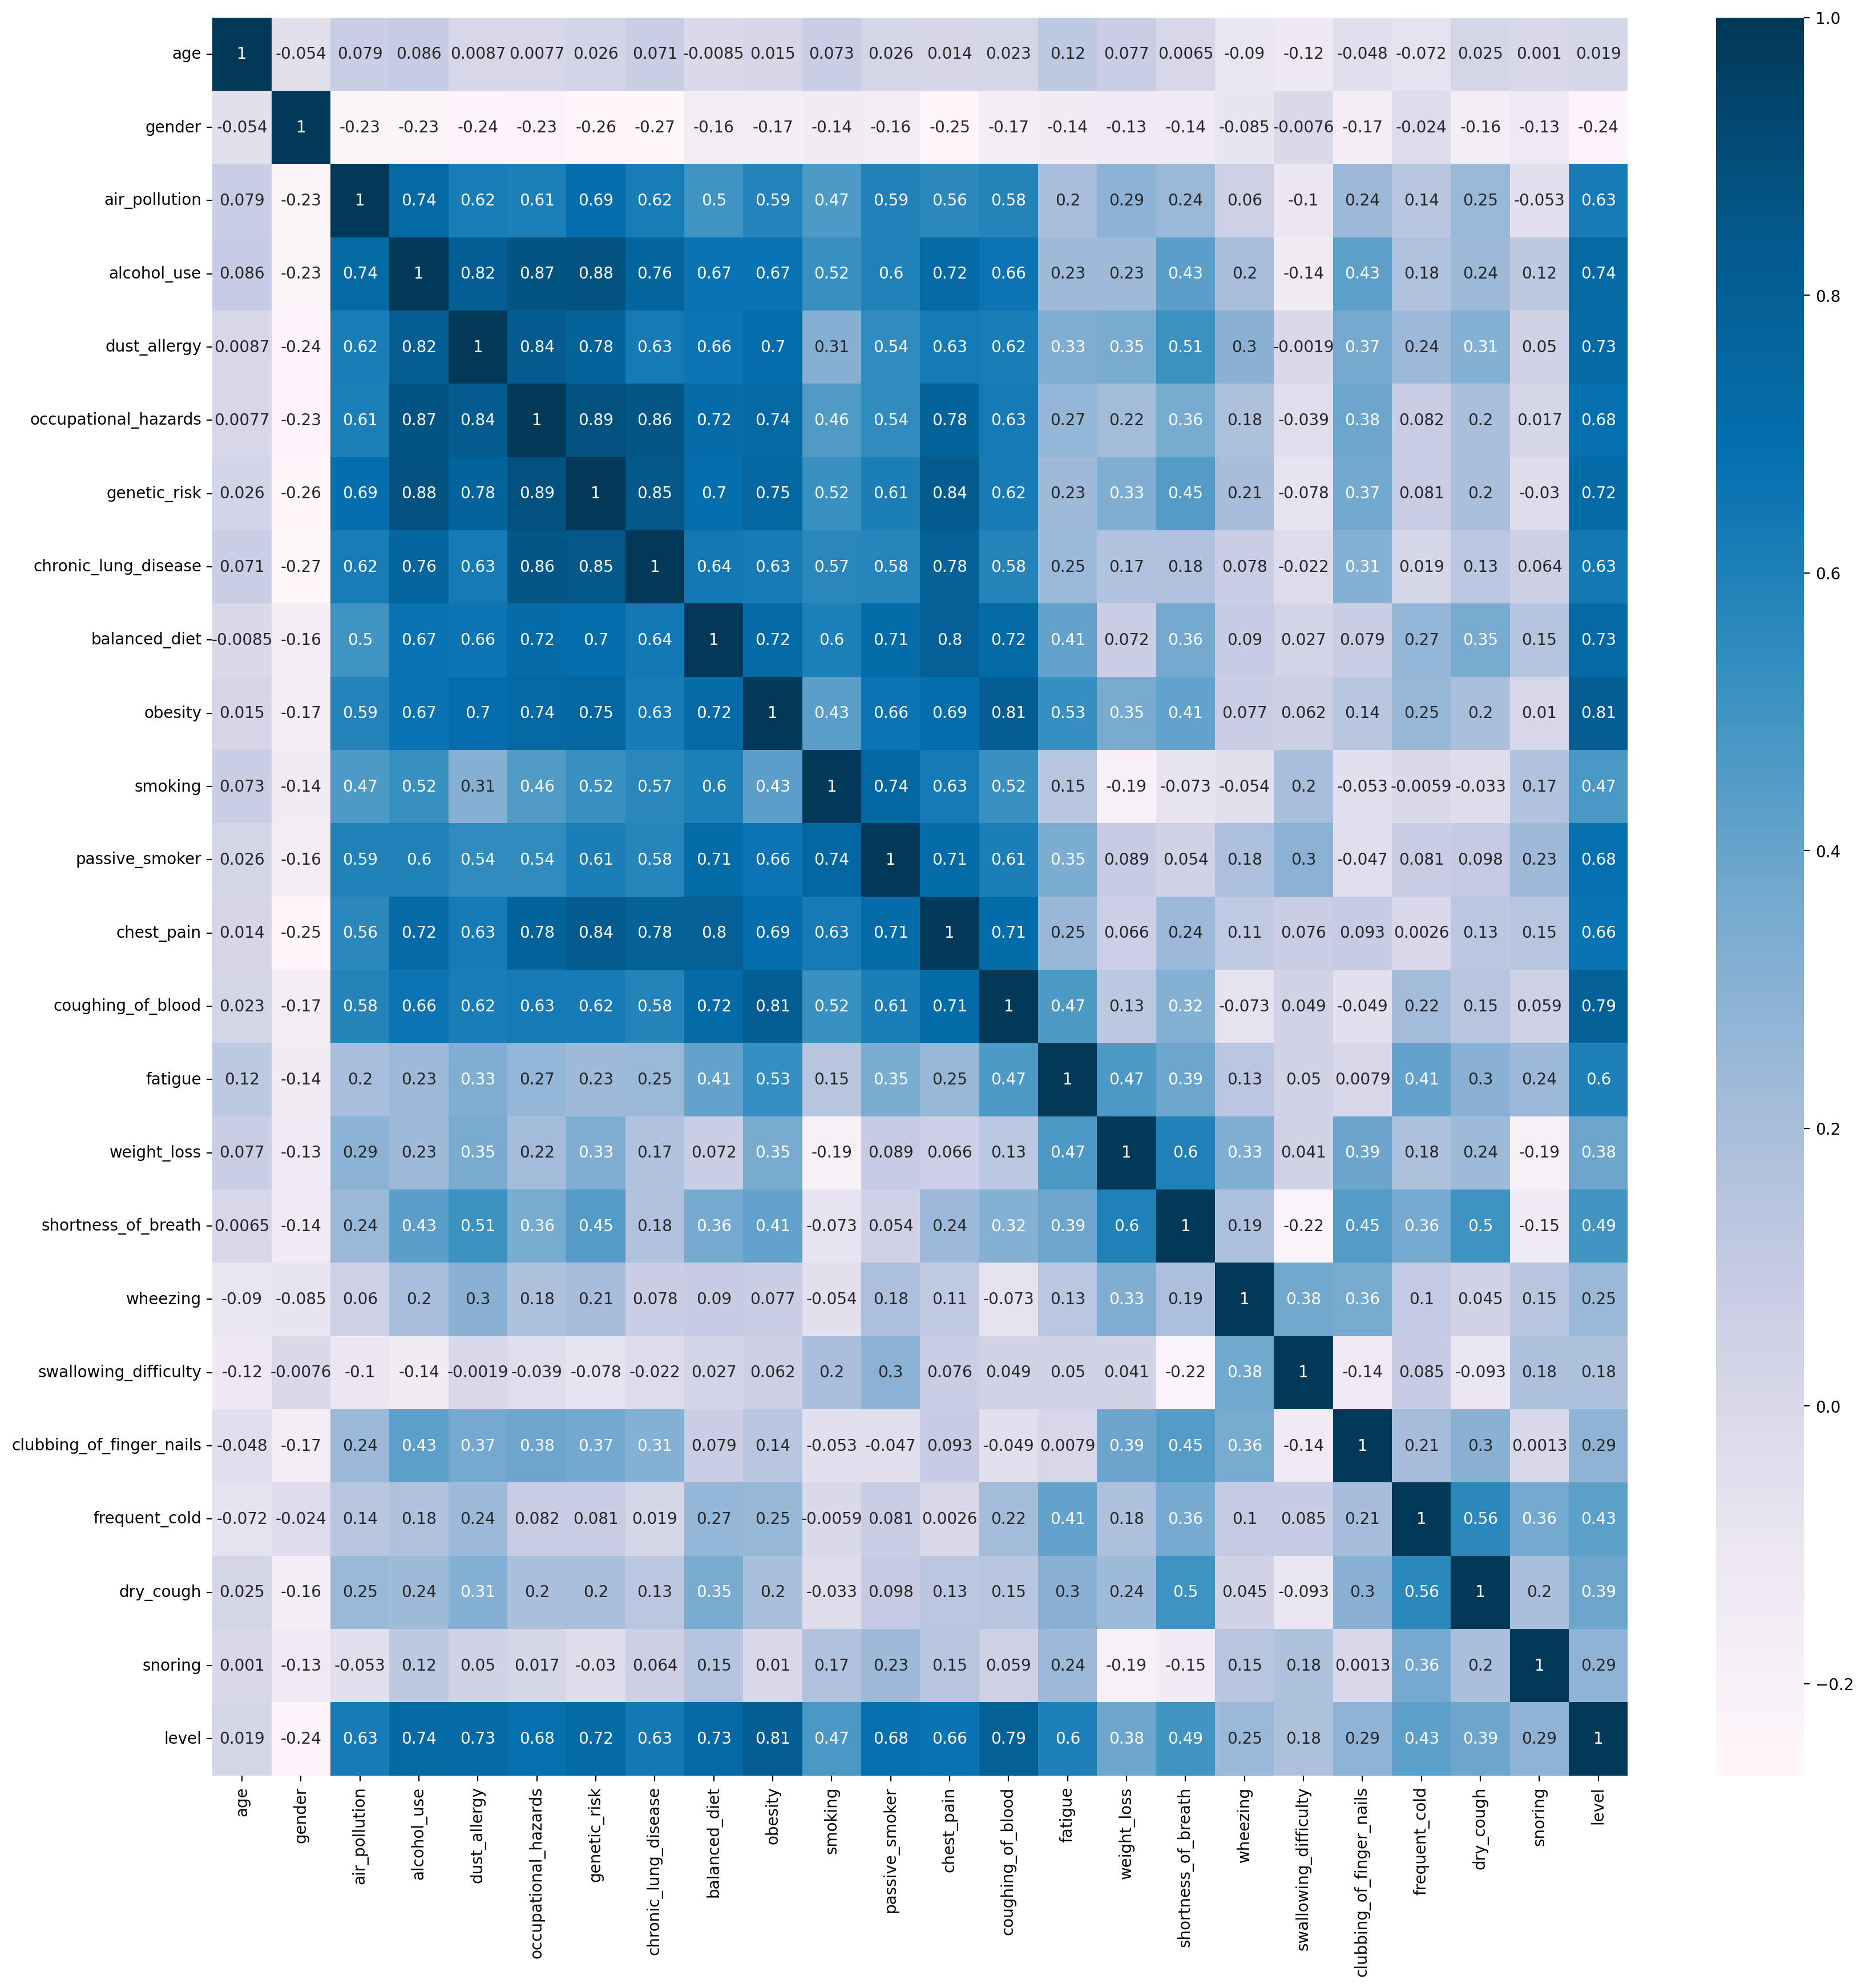

In [6]:
# Correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

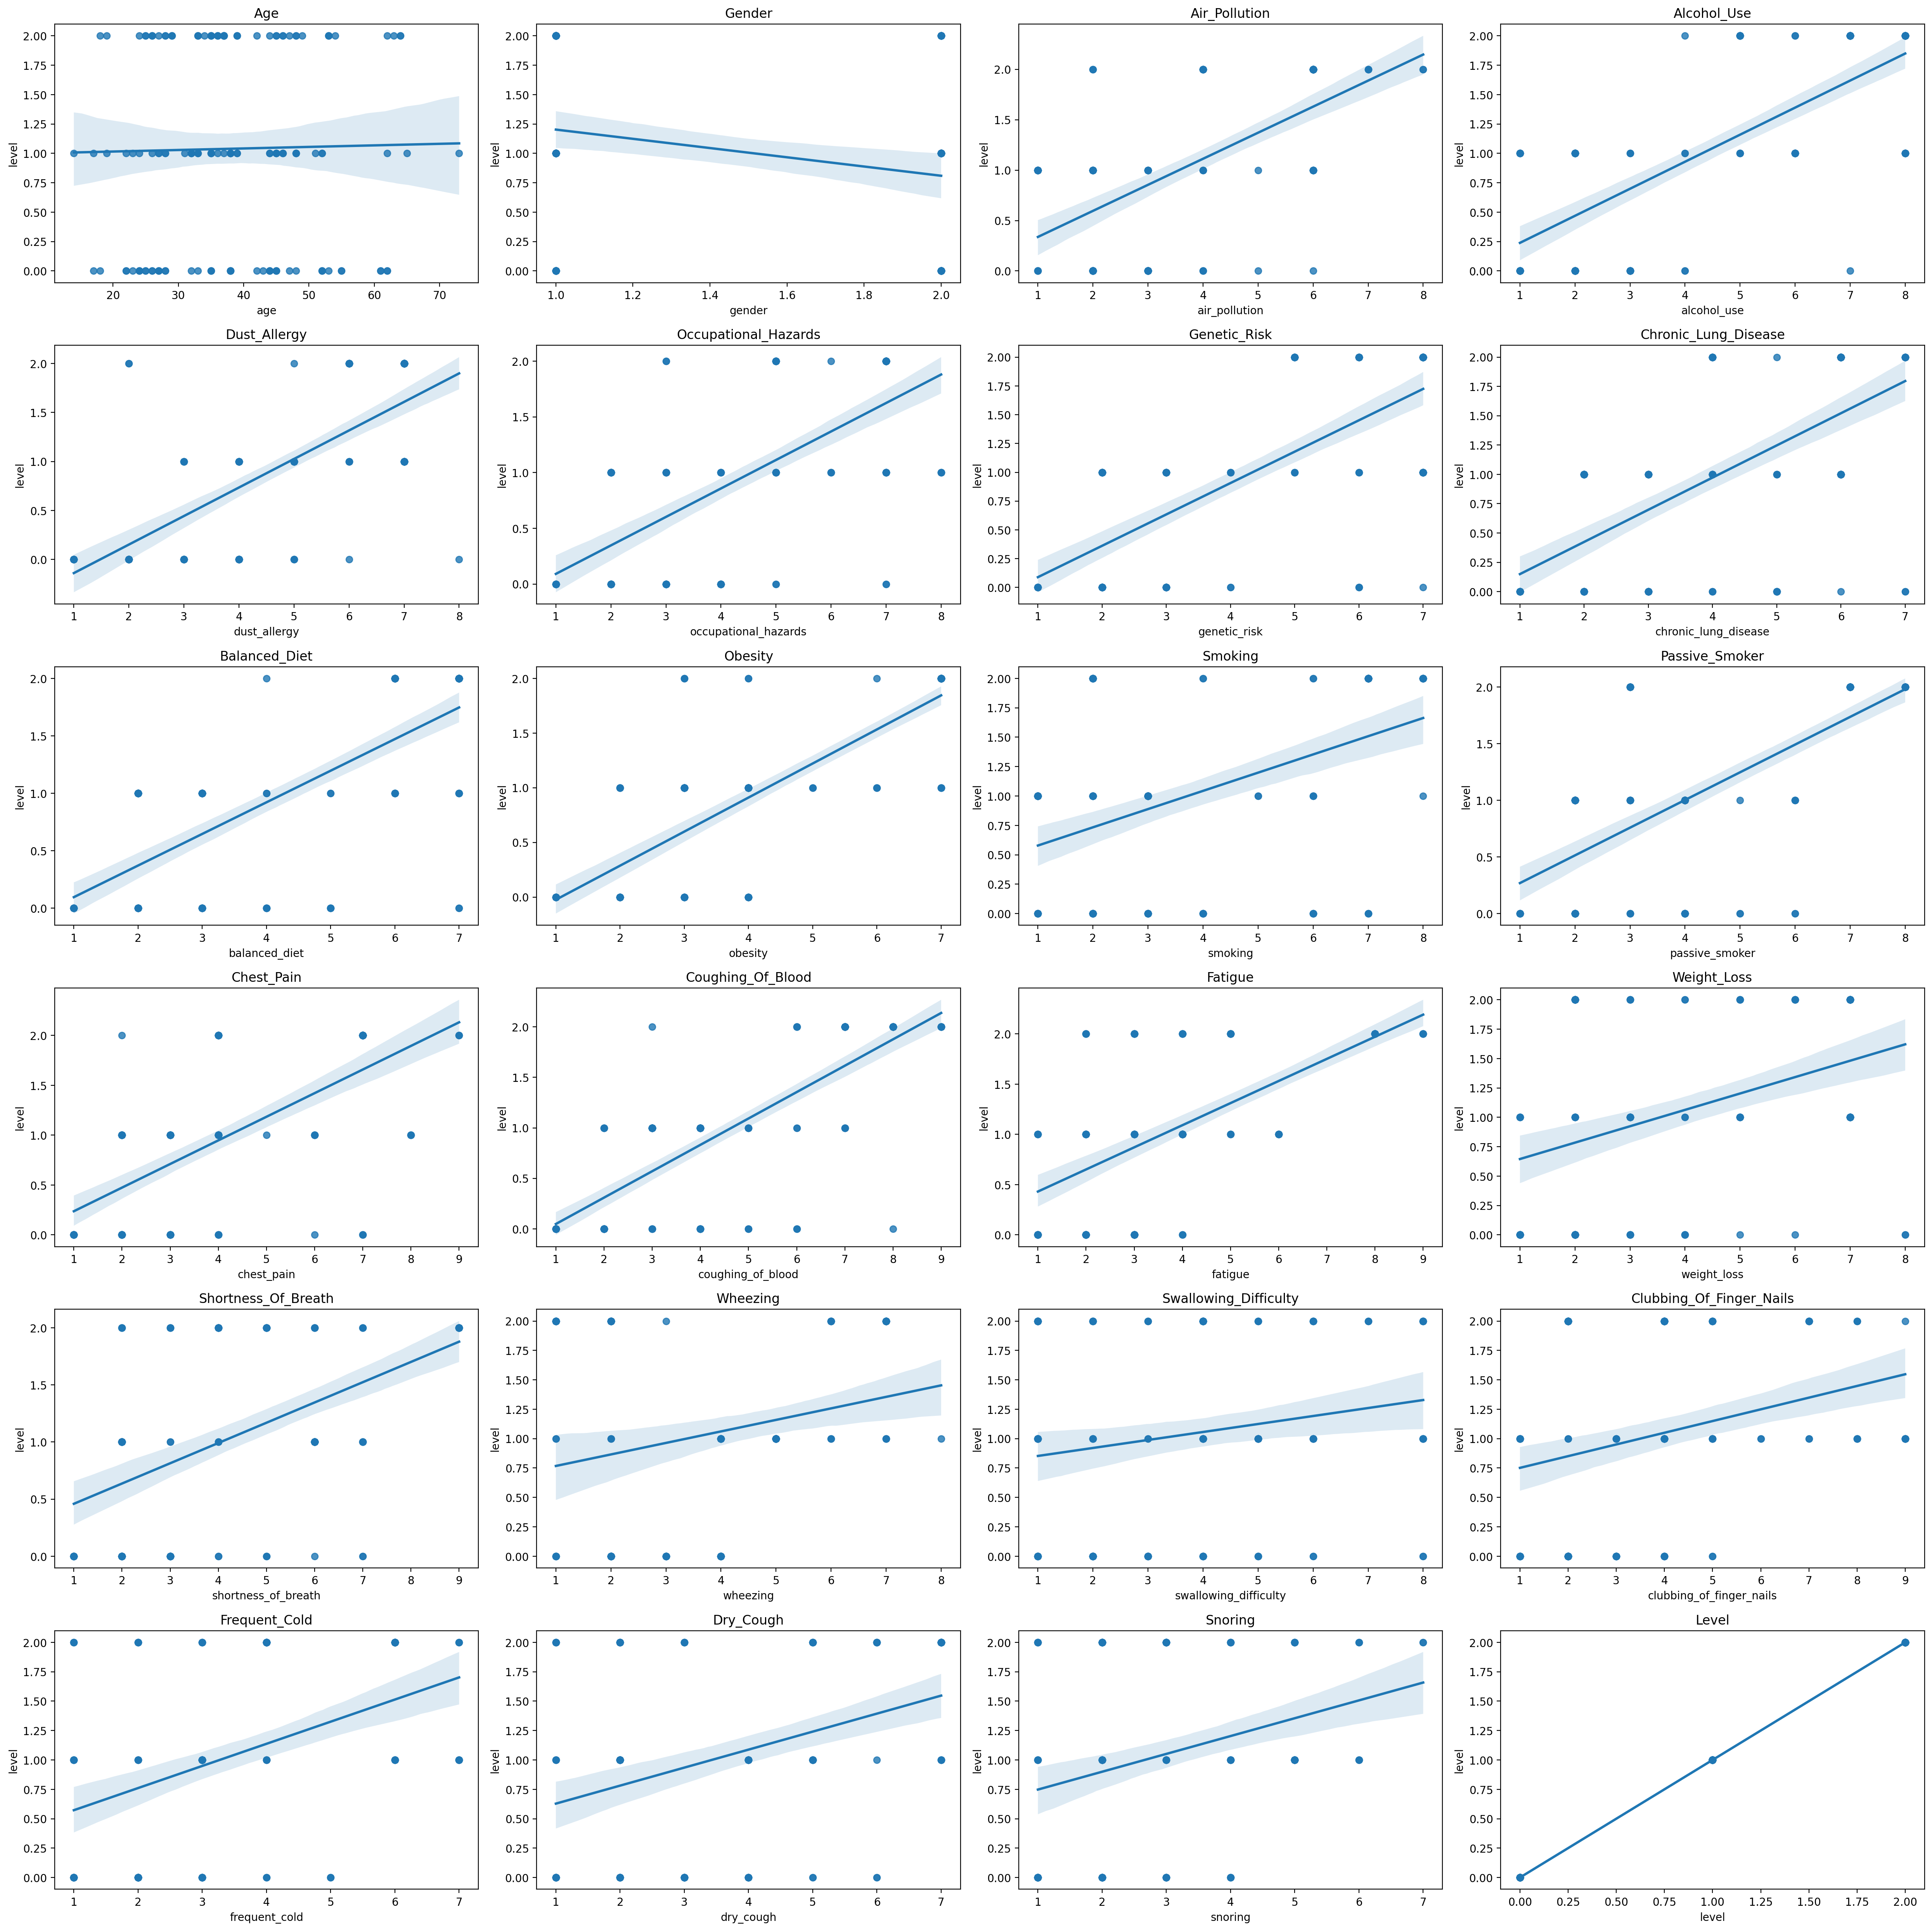

In [7]:
#Corresponding plots with a correlation to lung cancer for specific categories
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(25, 25))
ax = ax.flatten()

for ind, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, ax=ax[ind])
    ax[ind].set_title(col.title())
    
plt.tight_layout()
plt.show()

In [8]:
#Removes age and gender since no observed correlation
df_new = df.drop(columns=['age','gender']) # no visual correlation (nonlinear) between cancer level and age or gender
X = df_new.drop(columns='level')
y = df_new.level

#Displays correlation values between category and lung cancer risk
le = preprocessing.LabelEncoder()
df['level'] = le.fit_transform(df['level'])
corr = X.corr()
display(corr)

,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
air_pollution,1.000000,0.736960,0.615913,0.605881,0.690165,0.623945,0.496917,0.585509,0.465423,0.590956,...,0.583074,0.202325,0.288713,0.243410,0.059803,-0.100218,0.241962,0.140642,0.247631,-0.052964
alcohol_use,0.736960,1.000000,0.816946,0.869507,0.876886,0.759732,0.666956,0.667210,0.521694,0.596059,...,0.662990,0.230836,0.231882,0.432130,0.199140,-0.144582,0.429550,0.177573,0.237570,0.121772
dust_allergy,0.615913,0.816946,1.000000,0.835541,0.776458,0.629307,0.657294,0.701089,0.311894,0.541120,...,0.618415,0.331880,0.348295,0.512364,0.300813,-0.001859,0.365988,0.239689,0.314666,0.049892
occupational_hazards,0.605881,0.869507,0.835541,1.000000,0.885225,0.857867,0.715622,0.736990,0.460065,0.543224,...,0.631757,0.267658,0.223186,0.356308,0.179531,-0.039119,0.382604,0.081565,0.195024,0.016968
genetic_risk,0.690165,0.876886,0.776458,0.885225,1.000000,0.850901,0.695329,0.747868,0.516966,0.613924,...,0.624721,0.229213,0.328643,0.450340,0.205595,-0.078056,0.369903,0.080987,0.196722,-0.030366
chronic_lung_disease,0.623945,0.759732,0.629307,0.857867,0.850901,1.000000,0.636910,0.625587,0.565174,0.577883,...,0.583629,0.247468,0.169197,0.177361,0.078285,-0.022046,0.313717,0.019490,0.133634,0.063765
balanced_diet,0.496917,0.666956,0.657294,0.715622,0.695329,0.636910,1.000000,0.722903,0.604316,0.710019,...,0.720442,0.413034,0.071801,0.363592,0.089966,0.026972,0.078539,0.267694,0.349561,0.153940
obesity,0.585509,0.667210,0.701089,0.736990,0.747868,0.625587,0.722903,1.000000,0.433926,0.660263,...,0.809561,0.526309,0.352013,0.413883,0.076815,0.062211,0.143357,0.254706,0.196647,0.010074
smoking,0.465423,0.521694,0.311894,0.460065,0.516966,0.565174,0.604316,0.433926,1.000000,0.743586,...,0.518616,0.145280,-0.194974,-0.073227,-0.053757,0.202340,-0.053001,-0.005908,-0.033039,0.166131
passive_smoker,0.590956,0.596059,0.541120,0.543224,0.613924,0.577883,0.710019,0.660263,0.743586,1.000000,...,0.613912,0.345542,0.088981,0.054019,0.184095,0.295402,-0.046891,0.080657,0.097567,0.233045


In [9]:
# Random Forest Model
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



Our Random Forest Model is 98% accurate.

In [10]:
#Import Necessary Libraries
import joblib
from joblib import dump

# Using Random Forest Model to start prediction
dump(RF, '../models/param_predict_model.joblib')

model = joblib.load("../models/param_predict_model.joblib")


In [13]:
# import pandas as pd
from joblib import load

# Define the column names exactly as they were during model training
column_names = [
    'air_pollution', 'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk',
    'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking', 'passive_smoker',
    'chest_pain', 'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
    'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
    'dry_cough', 'snoring'
]

# Prompt for user input for each feature relevant to lung cancer prediction
air_pollution = int(input("Exposure to air pollution (0 for No, 1 for Yes): "))
alcohol_use = int(input("Alcohol use (0 for No, 1 for Yes): "))
dust_allergy = int(input("Dust allergy (0 for No, 1 for Yes): "))
occupational_hazards = int(input("Exposure to occupational hazards (0 for No, 1 for Yes): "))
genetic_risk = int(input("Genetic risk of lung cancer (0 for No, 1 for Yes): "))
chronic_lung_disease = int(input("Chronic lung disease (0 for No, 1 for Yes): "))
balanced_diet = int(input("Maintains a balanced diet (0 for No, 1 for Yes): "))
obesity = int(input("Obesity (0 for No, 1 for Yes): "))
smoking = int(input("Smoking (0 for No, 1 for Yes): "))
passive_smoker = int(input("Passive smoker (0 for No, 1 for Yes): "))
chest_pain = int(input("Experience chest pain (0 for No, 1 for Yes): "))
coughing_of_blood = int(input("Coughing of blood (0 for No, 1 for Yes): "))
fatigue = int(input("Experiences fatigue (0 for No, 1 for Yes): "))
weight_loss = int(input("Recent weight loss (0 for No, 1 for Yes): "))
shortness_of_breath = int(input("Shortness of breath (0 for No, 1 for Yes): "))
wheezing = int(input("Wheezing (0 for No, 1 for Yes): "))
swallowing_difficulty = int(input("Difficulty swallowing (0 for No, 1 for Yes): "))
clubbing_of_finger_nails = int(input("Clubbing of finger nails (0 for No, 1 for Yes): "))
frequent_cold = int(input("Frequent colds (0 for No, 1 for Yes): "))
dry_cough = int(input("Dry cough (0 for No, 1 for Yes): "))
snoring = int(input("Snoring (0 for No, 1 for Yes): "))

# Combine all input data into a DataFrame
input_data = [
    air_pollution, alcohol_use, dust_allergy, occupational_hazards, genetic_risk,
    chronic_lung_disease, balanced_diet, obesity, smoking, passive_smoker,
    chest_pain, coughing_of_blood, fatigue, weight_loss, shortness_of_breath,
    wheezing, swallowing_difficulty, clubbing_of_finger_nails, frequent_cold,
    dry_cough, snoring
]
input_df = pd.DataFrame([input_data], columns=column_names)

# Making the prediction using the loaded model to get probabilities
probabilities = model.predict_proba(input_df)
print("Probabilities for each class:", probabilities[0])

# Arranges different probabilities in order from low to high level
class_probabilities = dict(zip(model.classes_, probabilities[0]))
print("Formatted Probabilities:")
for class_label, prob in class_probabilities.items():
    print(f"Class {class_label}: Probability {prob:.2f}")


Exposure to air pollution (0 for No, 1 for Yes):  1
Alcohol use (0 for No, 1 for Yes):  1
Dust allergy (0 for No, 1 for Yes):  1
Exposure to occupational hazards (0 for No, 1 for Yes):  1
Genetic risk of lung cancer (0 for No, 1 for Yes):  1
Chronic lung disease (0 for No, 1 for Yes):  1
Maintains a balanced diet (0 for No, 1 for Yes):  1
Obesity (0 for No, 1 for Yes):  1
Smoking (0 for No, 1 for Yes):  1
Passive smoker (0 for No, 1 for Yes):  1
Experience chest pain (0 for No, 1 for Yes):  1
Coughing of blood (0 for No, 1 for Yes):  1
Experiences fatigue (0 for No, 1 for Yes):  1
Recent weight loss (0 for No, 1 for Yes):  1
Shortness of breath (0 for No, 1 for Yes):  1
Wheezing (0 for No, 1 for Yes):  1
Difficulty swallowing (0 for No, 1 for Yes):  1
Clubbing of finger nails (0 for No, 1 for Yes):  1
Frequent colds (0 for No, 1 for Yes):  1
Dry cough (0 for No, 1 for Yes):  1
Snoring (0 for No, 1 for Yes):  1


Probabilities for each class: [0.96 0.04 0.  ]
Formatted Probabilities:
Class 0: Probability 0.96
Class 1: Probability 0.04
Class 2: Probability 0.00
